## INSPECTING DATASET 


In [1]:
from sklearn import  preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import math
import numpy as np 
df = pd.read_csv('CustomerSegmentation.csv' , index_col = 0 , encoding = 'Unicode_escape' )
df.tail()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [2]:
# changing index
df.set_index("CustomerID" , inplace = True)

In [3]:
df.tail(45)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,
17581.0,23498,CLASSIC BICYCLE CLIPS,12,12/9/2011 12:21,1.45,United Kingdom
13777.0,20725,LUNCH BAG RED RETROSPOT,40,12/9/2011 12:23,1.45,United Kingdom
13777.0,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,12/9/2011 12:23,1.85,United Kingdom
13777.0,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,12/9/2011 12:25,0.72,United Kingdom
13777.0,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,12/9/2011 12:25,1.85,United Kingdom
15804.0,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,12/9/2011 12:31,0.39,United Kingdom
15804.0,22915,ASSORTED BOTTLE TOP MAGNETS,24,12/9/2011 12:31,0.19,United Kingdom
15804.0,22178,VICTORIAN GLASS HANGING T-LIGHT,12,12/9/2011 12:31,1.95,United Kingdom
15804.0,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,12/9/2011 12:31,1.25,United Kingdom


In [4]:
# checking for no value
df.isnull().sum()

StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [5]:
## We are judging on the basis of how frequent and how much the customer buy . So we do not need description column .

df.drop(['Description'] , inplace = True , axis = 1)

In [6]:
df.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,
17850.0,85123A,6,12/1/2010 8:26,2.55,United Kingdom
17850.0,71053,6,12/1/2010 8:26,3.39,United Kingdom
17850.0,84406B,8,12/1/2010 8:26,2.75,United Kingdom
17850.0,84029G,6,12/1/2010 8:26,3.39,United Kingdom
17850.0,84029E,6,12/1/2010 8:26,3.39,United Kingdom


In [7]:
df['amount'] = df['Quantity'] * df['UnitPrice']

In [8]:
df.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,Country,amount
CustomerID,,,,,,
17850.0,85123A,6,12/1/2010 8:26,2.55,United Kingdom,15.30
17850.0,71053,6,12/1/2010 8:26,3.39,United Kingdom,20.34
17850.0,84406B,8,12/1/2010 8:26,2.75,United Kingdom,22.00
17850.0,84029G,6,12/1/2010 8:26,3.39,United Kingdom,20.34
17850.0,84029E,6,12/1/2010 8:26,3.39,United Kingdom,20.34


In [9]:
amount = df.groupby('CustomerID')['amount'].sum()

In [10]:
amount.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: amount, dtype: float64

In [11]:
freq = df.groupby('CustomerID')['InvoiceDate'].count()

In [12]:
freq.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceDate, dtype: int64

In [13]:
# creating file that will be put on the model )
test = pd.merge(amount, freq , on = 'CustomerID', how = 'inner')
test.head()

,amount,InvoiceDate
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17


In [14]:
test.rename( columns = { 'InvoiceDate' : 'frequency' } , inplace = True )
test['avg amount'] = test['amount'] / test['frequency'] 
test.head()

,amount,frequency,avg amount
CustomerID,,,
12346.0,0.00,2,0.000000
12347.0,4310.00,182,23.681319
12348.0,1797.24,31,57.975484
12349.0,1757.55,73,24.076027
12350.0,334.40,17,19.670588


In [15]:
## some element in amount are less that zero . Counting such
test[test['amount']<0].count()


amount        42
frequency     42
avg amount    42
dtype: int64

In [16]:
print(len(test))

4372


In [17]:
## out of 4300 customer this happen in only 40 . We can drop these but that will be bad ig . 
## We try to replace with positive
for i in range(len(test)) :
    if(test['amount'].iloc[i]<0) :
       test['amount'].iloc[i] = -1 * test['amount'].iloc[i]
    
for i in range(len(test)) :
    if(test['avg amount'].iloc[i]<0) :
       test['avg amount'].iloc[i] = -1 * test['avg amount'].iloc[i]
    

 

/tmp/ipykernel_5157/334351506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['amount'].iloc[i] = -1 * test['amount'].iloc[i]
/tmp/ipykernel_5157/334351506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['avg amount'].iloc[i] = -1 * test['avg amount'].iloc[i]


In [18]:
test.describe()

,amount,frequency,avg amount
count,4372.000000,4372.000000,4372.000000
mean,1904.511458,93.053294,32.950053
std,8217.944672,232.471608,126.322233
min,0.000000,1.000000,0.000000
25%,296.170000,17.000000,11.231254
50%,650.430000,42.000000,16.991706
75%,1612.295000,102.000000,23.737651
max,279489.020000,7983.000000,4287.630000


In [19]:
## as we can see min amount is now positive . 

## MODELLING using mean shift


In [20]:
X = np.array(test).astype(float)

Xk= preprocessing.scale(X)
km = KMeans(n_clusters = 3)
km.fit(Xk)
clf = MeanShift()
clf.fit(X)


/home/user/ENTER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MeanShift()

In [21]:
## give array of category we have
labels = clf.labels_

In [22]:
test['category mean shift'] = np.nan # creating a column with nan value . We fill fill it using for loop
for i in range(len(labels)) :
    test['category mean shift' ].iloc[i] = labels[i]
    

/tmp/ipykernel_5157/2888391620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['category mean shift' ].iloc[i] = labels[i]


In [23]:
test.head()

,amount,frequency,avg amount,category mean shift
CustomerID,,,,
12346.0,0.00,2,0.000000,0.0
12347.0,4310.00,182,23.681319,0.0
12348.0,1797.24,31,57.975484,0.0
12349.0,1757.55,73,24.076027,0.0
12350.0,334.40,17,19.670588,0.0


In [24]:
test['category mean shift'].unique()

array([ 0.,  1.,  8., 14.,  2.,  4.,  3., 25.,  7.,  5., 20., 18., 24.,
        6., 21., 15., 26., 10., 13., 22., 19., 17.,  9., 12., 16., 23.,
       11.])

## too many cluster using meanshift . Trying to do with kmean 

##

In [25]:
Xk = np.array(test).astype(float)
Xk= preprocessing.scale(Xk )
km = KMeans(n_clusters = 2 , init='k-means++')
km.fit(Xk)


/home/user/ENTER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [26]:
labelsk = km.labels_

In [27]:
test['kmean'] = np.nan
for i in range(len(labels)) :
    test['kmean' ].iloc[i] = labelsk[i]
    

/tmp/ipykernel_5157/2877899660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['kmean' ].iloc[i] = labelsk[i]


In [28]:
test.head()


,amount,frequency,avg amount,category mean shift,kmean
CustomerID,,,,,
12346.0,0.00,2,0.000000,0.0,0.0
12347.0,4310.00,182,23.681319,0.0,0.0
12348.0,1797.24,31,57.975484,0.0,0.0
12349.0,1757.55,73,24.076027,0.0,0.0
12350.0,334.40,17,19.670588,0.0,0.0


In [29]:
first = test[(test['kmean']==0 )]
first.describe()

,amount,frequency,avg amount,category mean shift,kmean
count,4353.000000,4353.000000,4353.000000,4353.000000,4353.0
mean,1508.733137,84.186997,32.418365,0.224673,0.0
std,2955.625080,124.540283,125.631719,1.152271,0.0
min,0.000000,1.000000,0.000000,0.000000,0.0
25%,294.400000,17.000000,11.229016,0.000000,0.0
50%,646.680000,41.000000,16.976000,0.000000,0.0
75%,1592.180000,101.000000,23.625143,0.000000,0.0
max,51823.720000,1677.000000,4287.630000,9.000000,0.0


In [30]:
second = test[(test['kmean']==1 )]
second.describe()

,amount,frequency,avg amount,category mean shift,kmean
count,19.000000,19.000000,19.000000,19.000000,19.0
mean,92579.407895,2124.368421,154.762508,17.578947,1.0
std,74638.868608,2235.827468,207.790312,5.600752,0.0
min,11713.850000,79.000000,4.210586,6.000000,1.0
25%,51806.640000,436.000000,23.156063,13.500000,1.0
50%,59419.340000,1420.000000,81.900911,18.000000,1.0
75%,118554.795000,2636.500000,146.538816,22.000000,1.0
max,279489.020000,7983.000000,667.732152,26.000000,1.0


In [31]:
## so the bulk of sale is done by customer belonging to category 1  . not 0 

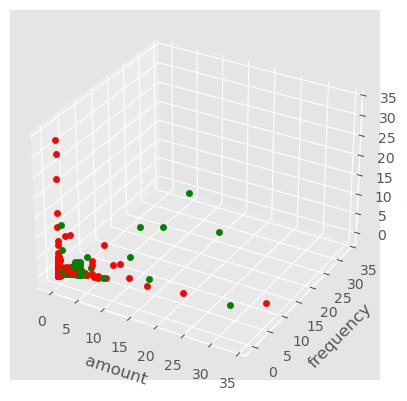

In [32]:
style.use("ggplot")
color = len(test)*['r' , 'g' ]
fig = plt.figure()
ax = fig.add_subplot(111 , projection = '3d')
ax.set_xlabel('amount')
ax.set_ylabel('frequency')
ax.set_zlabel('avg amount')
graphX = test[['amount']]
graphX = np.array(graphX)
graphX = preprocessing.scale(graphX)
graphY = test[['frequency']]
graphY = np.array(graphY)
graphY = preprocessing.scale(graphY)
graphZ = test['avg amount']
graphZ = np.array(graphZ)
graphZ = preprocessing.scale(graphZ)
for i in range(len(test)) :
  ax.scatter(graphX[i] , graphY[i] , graphZ[i] , c = color[labels[i]])
    
plt.show()

## TRYING THE SAME BUT DROPPING THE AMOUNT COLUMN

In [33]:
test1 = test.drop(['avg amount'],  axis = 1)

In [34]:
Xm = np.array(test1).astype(float)
Xm= preprocessing.scale(Xm)
kz = KMeans(n_clusters = 3 , init='k-means++' )
kz.fit(Xm)


/home/user/ENTER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [35]:
labelskm = kz.labels_
test.head()

,amount,frequency,avg amount,category mean shift,kmean
CustomerID,,,,,
12346.0,0.00,2,0.000000,0.0,0.0
12347.0,4310.00,182,23.681319,0.0,0.0
12348.0,1797.24,31,57.975484,0.0,0.0
12349.0,1757.55,73,24.076027,0.0,0.0
12350.0,334.40,17,19.670588,0.0,0.0


In [36]:
test1['kmean after drop'] = np.nan
for i in range(len(test1)) :
    test1['kmean after drop' ].iloc[i] = labelsk[i]

/tmp/ipykernel_5157/3189512557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['kmean after drop' ].iloc[i] = labelsk[i]


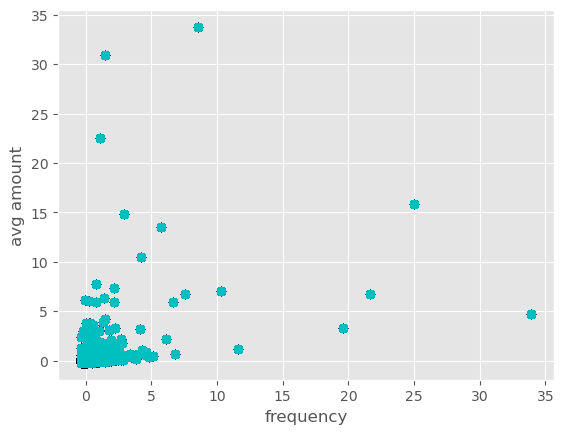

In [37]:
plt.xlabel('frequency')
plt.ylabel('avg amount')
col = len(test) * ['c' , 'g' , 'b'  ]
Xplot = test1['frequency']
Xplot = np.array(Xplot)
Xplot = preprocessing.scale(Xplot)
Yplot = test1['amount']
Yplot = np.array(Yplot)
Yplot = preprocessing.scale(Yplot)
for i in range(len(test1)) :
     plt.scatter( Xplot , Yplot , c = col[labelskm[i]] )
plt.show()

## kmean with 3 column and n = 2 is best . green representing more valuable and red as less valuable customer